# 数据分析之新闻分类

## 1.1 案例背景 

新闻分类是文本分类中常见的应用场景。在传统分类模式下，往往是通过人工对新闻内容进行审核，从而将新闻划分到合适的类别中。这种方式会消耗大量的人力资源，并且效率不高。

## 1.2 任务与实现

我们的任务在于，根据新闻文本的内容，进行文本预处理，建模等操作，从而可以自动将新闻划分到最可能的类别中，节省人力资源。

具体实现内容包括：

1.2.1 能够对文本数据进行预处理，包括文本清洗，分词，去除停用词，文本向量化等操作。

1.2.2 能够通过python统计词频，生成词云图。

1.2.3 能够通过方差分析，进行特征选择。

1.2.4 能够根据文本内容，对文本数据进行分类。

## 1.3 任务扩展

该实现也可以用于其他根据文本内容来实现分类的场景，例如，垃圾邮件过滤，情感分析等。

# 1.4 数据集描述

数据集为2016年1月1日 - 2018年10月9日期间新闻联播的数据，包括4列：
列名：data(新闻日期), tag(新闻类别), headline(新闻标题), content(详细内容) 

# 2 程序实现

## 2.1 加载数据集
加载数据集，并查看数据的基本信息。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 为了显示中文的一些设置
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

news = pd.read_csv('D:\\code_project\\datasource\\news.csv')
print(news.shape)
display(news.head())

(20738, 4)


,date,tag,headline,content
0,2016-01-01,详细全文,陆军领导机构火箭军战略支援部队成立大会在京举行 习近平向中国人民解放军陆军火箭军战略支援部队...,中国人民解放军陆军领导机构、中国人民解放军火箭军、中国人民解放军战略支援部队成立大会2015...
1,2016-01-01,详细全文,中央军委印发《关于深化国防和军队改革的意见》,经中央军委主席习近平批准，中央军委近日印发了《关于深化国防和军队改革的意见》。\n《意见》强...
2,2016-01-01,详细全文,《习近平关于严明党的纪律和规矩论述摘编》出版发行,由中共中央纪律检查委员会、中共中央文献研究室编辑的《习近平关于严明党的纪律和规矩论述摘编》一...
3,2016-01-01,详细全文,以实际行动向党中央看齐 向高标准努力,广大党员干部正在积极学习习近平总书记在中央政治局专题民主生活会上的重要讲话。大家纷纷表示要把...
4,2016-01-01,详细全文,【年终特稿】关键之年 改革挺进深水区,刚刚过去的2015年，是全面深化改革的关键之年。改革集中发力在制约经济社会发展的深层次矛盾，...


## 2.2 数据预处理
文本数据，是一种非结构化数据，与我们传统分析的数据有所不同。因此，其预处理的步骤与方式也会和传统数据有所差异。本数据预处理主要包含：

缺失值处理；

重复值处理；

文本内容清洗；

分词；

停用词处理。

### 2.2.1 缺失值处理
检测缺失值，并对缺失值进行处理

In [4]:
news.isnull().sum()

date          0
tag           0
headline      0
content     107
dtype: int64

In [5]:
# 另一种方法查看缺失值
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20738 entries, 0 to 20737
Data columns (total 4 columns):
date        20738 non-null object
tag         20738 non-null object
headline    20738 non-null object
content     20631 non-null object
dtypes: object(4)
memory usage: 648.2+ KB


可知，内容列存在缺失值，我们使用标题来代替内容。

In [9]:
index = news[news['content'].isnull()].index
news['content'][index] = news['headline'][index]
news.isnull().sum()

date        0
tag         0
headline    0
content     0
dtype: int64

填充缺失值后，我们检查下填充的效果。

In [10]:
news.loc[index].sample(5)

,date,tag,headline,content
13311,2017-10-25,详细全文,李克强同志简历,李克强同志简历
3571,2016-07-13,详细全文,李克强离京前往蒙古国进行正式访问并出席第十一届亚欧首脑会议,李克强离京前往蒙古国进行正式访问并出席第十一届亚欧首脑会议
11252,2017-07-23,详细全文,【砥砺奋进的五年·信息通信业成就】我国5G网络有望2020年实现商用,【砥砺奋进的五年·信息通信业成就】我国5G网络有望2020年实现商用
944,2016-02-26,详细全文,二十国集团财长和央行行长会议在上海举行,二十国集团财长和央行行长会议在上海举行
13288,2017-10-24,详细全文,中国共产党第十九届中央纪律检查委员会委员名单,中国共产党第十九届中央纪律检查委员会委员名单


### 2.2.2 重复值处理
重复的数据，对文本分析和建模没有帮助，我们可以直接删除重复记录。

In [12]:
print(news.duplicated().sum())
display(news[news.duplicated()])

5


,date,tag,headline,content
13280,2017-10-24,详细全文,中国共产党第十九届中央委员会委员名单,中国共产党第十九届中央委员会委员名单
13284,2017-10-24,详细全文,中国共产党第十九届中央委员会候补委员名单,中国共产党第十九届中央委员会候补委员名单
13288,2017-10-24,详细全文,中国共产党第十九届中央纪律检查委员会委员名单,中国共产党第十九届中央纪律检查委员会委员名单
13305,2017-10-25,详细全文,中国共产党第十九届中央委员会第一次全体会议公报,中国共产党第十九届中央委员会第一次全体会议公报
13325,2017-10-25,详细全文,中国共产党第十九届中央纪律检查委员会第一次全体会议公报,中国共产党第十九届中央纪律检查委员会第一次全体会议公报


删除重复的记录，并检测是否删除成功。

In [14]:
news.drop_duplicates(inplace=True)
print(news.duplicated().sum())

0


### 2.2.3 文本内容清洗
文本中的标点符号，与一些特殊字符，通常对文本分析的作用不是很大，这里我们可以将其去除。

In [16]:
import re
pattern = r'[^\w\d]+'
re_obj = re.compile(pattern)

def clear(text):
    return re_obj.sub(' ',text)

news['content'] = news['content'].apply(clear)

In [17]:
news.sample(5)

,date,tag,headline,content
8362,2017-03-13,国内,土高官入荷受阻事件发酵,土耳其总统埃尔多安12号谴责荷兰政府阻拦土耳其政府多名官员进入荷兰宣传修宪公投的计划 他表示...
20152,2018-09-11,详细全文,习近平离京赴俄罗斯出席第四届东方经济论坛,9月11日上午 国家主席习近平乘专机离开北京 应俄罗斯联邦总统普京邀请 赴俄罗斯符拉迪沃斯托...
3411,2016-07-05,详细全文,【庆祝中国共产党成立95周年】光辉历程：全面深化改革,继续今天的庆祝中国共产党成立95周年节目 光辉历程 党的十八大以来 以习近平同志为总书记的党...
20404,2018-09-22,详细全文,农民日报文章：中国农民礼赞！,在第一个 中国农民丰收节 到来之际 农民日报发表编辑部文章 题目是 中国农民礼赞
20065,2018-09-06,国内,2018中国网络媒体论坛在宁波开幕,2018中国网络媒体论坛今天在宁波开幕 论坛以 智能互联时代的媒体变革与发展 为主题 700...


### 2.2.4 分词
分词，是将连续的文本，分割成语义合理的若干词汇序列。对于英文来说，分词是非常容易地，但是中文分词会有一定的难度。我们可以通过jieba来实现分词的功能。

In [18]:
import jieba

s = '今天，外面下了一场很大的雨。'
words = jieba.cut(s)
print(list(words))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\HSUHUI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.957 seconds.
Prefix dict has been built succesfully.


['今天', '，', '外面', '下', '了', '一场', '很大', '的', '雨', '。']


In [19]:
def cut_word(text):
    return jieba.cut(text)

news['content'] = news['content'].apply(cut_word)
news.sample(5)

,date,tag,headline,content
2661,2016-05-26,详细全文,国务院印发《清理规范投资项目报建审批事项实施方案》,<generator object Tokenizer.cut at 0x0000021F3...
8138,2017-03-01,国际,特朗普寻求国会支持万亿基建计划,<generator object Tokenizer.cut at 0x0000021F3...
11995,2017-08-26,详细全文,强化监督 压实责任 为脱贫攻坚护航,<generator object Tokenizer.cut at 0x0000021F3...
9318,2017-04-24,详细全文,区域经济增势明显 全国税收增长较快,<generator object Tokenizer.cut at 0x0000021F3...
5348,2016-10-14,详细全文,习近平看望柬埔寨太后,<generator object Tokenizer.cut at 0x0000021F3...


### 2.2.5 停用词处理
停用词，是指在我们的词句中大量出现，但是对语义分析没有帮助的词。对于这样的词汇，我们通常将其删除，这样的好处是：

可以降低存储空间消耗；

可以江绍计算时间消耗

In [21]:
def get_stopwords():
    s = set()
    with open('D:\code_project\datasource\stopword.txt', encoding='UTF-8') as f:
        for line in f:
            s.add(line.strip())
    return s

def remove_stopwords(words):
    return [word for word in words if word not in stopwords]

stopwords = get_stopwords()
news['content'] = news['content'].apply(remove_stopwords)

In [22]:
news.sample(5)

,date,tag,headline,content
9360,2017-04-26,详细全文,张德江会见缅甸客人,"[全国人大常委会, 委员长, 张德江, 26, 日, 人民大会堂, 会见, 缅甸联邦, 议会..."
17840,2018-05-27,详细全文,四川：长江增绿 生态富民,"[四川, 建设, 长江上游, 生态, 屏障, , 正确, 把握, 生态, 环境保护, 经济..."
10312,2017-06-06,详细全文,940万考生明天将迎接高考,"[明天, , 全国, 940, 万, 考生, 走进, 考场, , 参加, 2017, 年..."
14910,2018-01-07,国内,黑龙江兴凯湖现“冰雪长城”,"[受, 近期, 持续, 低温, 大风, 影响, , 黑龙江, 兴凯湖, , 高度, 约,..."
8068,2017-02-27,详细全文,交通运输部：今年力争再降物流成本,"[ , 国务院新闻办, 新闻, 发布会, , 交通运输, 部, 部长, 李小鹏, 介绍, ..."


## 2.3 数据探索 

### 2.3.1 类别数量分布

详细全文    11529
国内       6186
国际       3018
Name: tag, dtype: int64


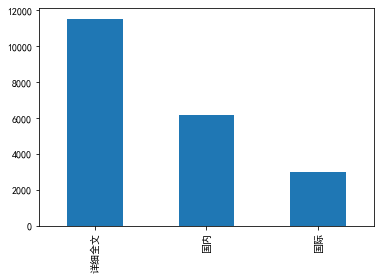

In [23]:
t = news['tag'].value_counts()
print(t)
t.plot(kind='bar')

### 2.3.2 年份数量分布

2017    7903
2016    6896
2018    5934
Name: 0, dtype: int64


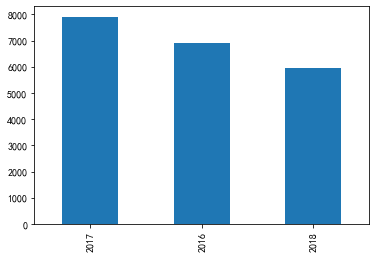

In [27]:
t = news['date'].str.split('-', expand=True)
t0 = t[0].value_counts()
print(t0)
t0.plot(kind='bar')

### 2.3.3 词汇统计
#### 2.3.3.1 词汇量统计

In [30]:
from itertools import chain
from collections import Counter

list_2d = news['content'].tolist()
#将二维列表扁平化为一维列表.
list_1d = list(chain.from_iterable(list_2d))
print(f'词汇总量：{len(list_1d)}')
c = Counter(list_1d)
print(f'不重复词汇数量：{len(c)}')
common = c.most_common(15)
print(common)

词汇总量：2792302
不重复词汇数量：90222
[(' ', 598093), ('发展', 20415), ('中国', 18790), ('习近平', 13424), ('合作', 12335), ('新', 11735), ('年', 11690), ('中', 10953), ('国家', 10879), ('日', 10746), ('工作', 9335), ('建设', 8345), ('月', 8193), ('经济', 7336), ('主席', 6786)]


#### 2.3.3.2 词频统计

<BarContainer object of 14 artists>

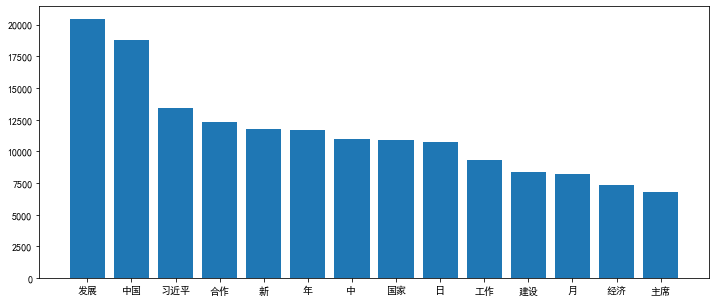

In [32]:
vocabulary, frequency = [], []
for v, f in common[1:]:
    vocabulary.append(v)
    frequency.append(f)
plt.figure(figsize=(12,5))
plt.bar(vocabulary, frequency)

#### 2.3.3.3 百分比统计

['0.73', '0.67', '0.48', '0.44', '0.42', '0.42', '0.39', '0.39', '0.38', '0.33', '0.30', '0.29', '0.26', '0.24']


<BarContainer object of 14 artists>

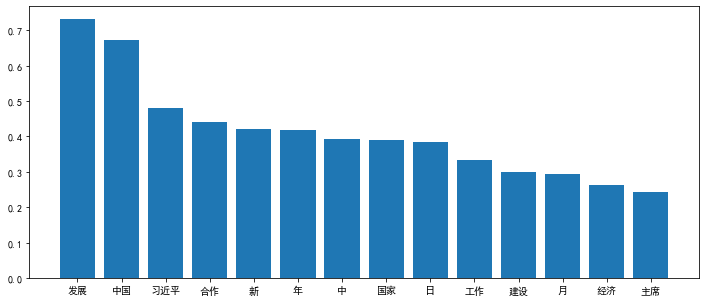

In [33]:
total = len(list_1d)
percentage = [v*100/total for v in frequency]
print([f"{v:.2f}" for v in percentage])
plt.figure(figsize=(12,5))
plt.bar(vocabulary, percentage)

#### 2.3.3.4 新闻词汇长度统计

<BarContainer object of 15 artists>

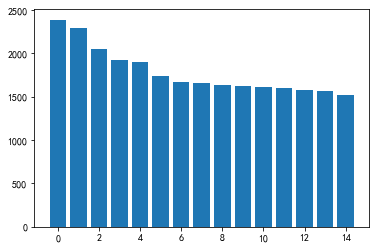

In [34]:
num = [len(li) for li in list_2d]
length = 15
plt.bar(range(length), sorted(num, reverse=True)[:length])

#### 2.3.3.5 新闻词汇长度分布统计

(array([1.7685e+04, 2.5670e+03, 2.8600e+02, 1.0300e+02, 3.8000e+01,
        3.2000e+01, 1.6000e+01, 2.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([1.0000e+00, 2.3980e+02, 4.7860e+02, 7.1740e+02, 9.5620e+02,
        1.1950e+03, 1.4338e+03, 1.6726e+03, 1.9114e+03, 2.1502e+03,
        2.3890e+03]),
 <a list of 10 Patch objects>)

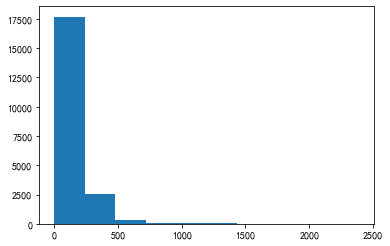

In [35]:
plt.hist(num)

### 2.3.4 生成词云图
python中，wordcloud 模块提供了生成词云图的功能，我们可以使用该模块生成词云图。

#### 2.3.4.1 标准词云图

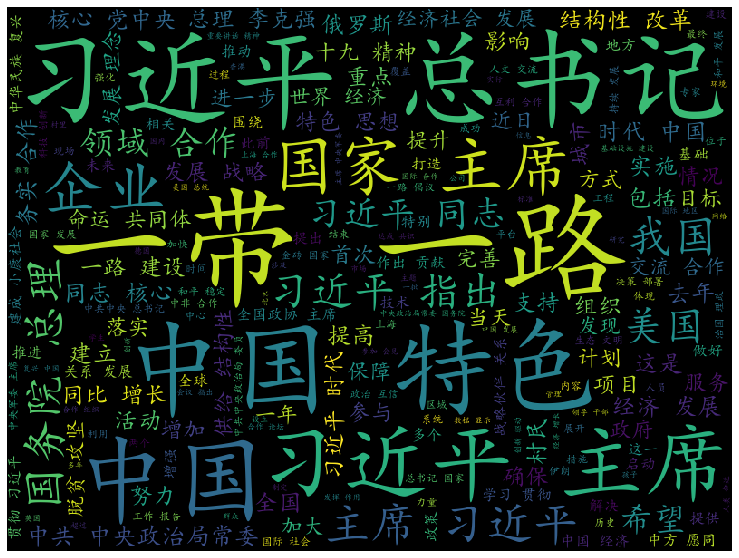

In [37]:
from wordcloud import WordCloud
#需要指定字体的位置，否则中文无法正常显示。
wc = WordCloud(font_path=r'C:\\Windows\\Fonts\\simkai.ttf', width=800, height=600)
join_words = ' '.join(list_1d)
img = wc.generate(join_words)
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')
wc.to_file('D:\\nlp_course\\python数据分析文本分类公开课\\wordcloud.png')

#### 2.3.4.2 自定义背景
我们可以使用制定的图片作为背景，生成词云图

(-0.5, 2108.5, 1625.5, -0.5)

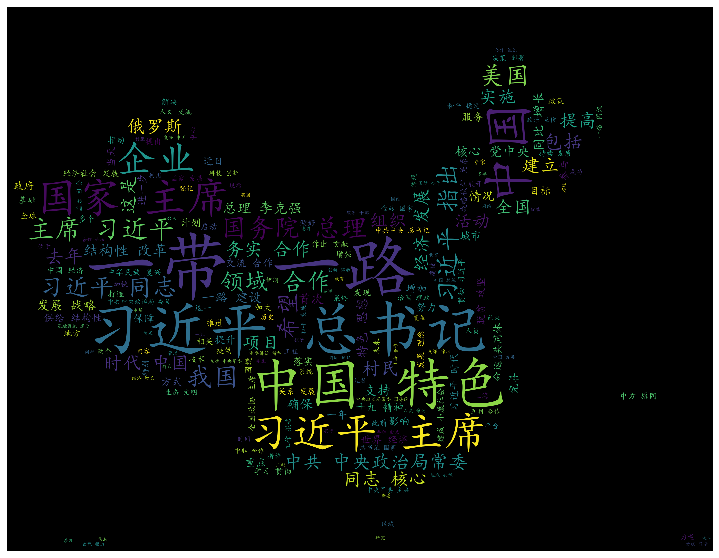

In [39]:
wc = WordCloud(font_path=r'C:\\Windows\\Fonts\\simkai.ttf', width=800, height=600, 
              mask=plt.imread('D:\\nlp_course\\python数据分析文本分类公开课\\ChinaMap.jpg'))
img = wc.generate(join_words)
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')

## 2.4 文本向量化

对于文本数据进行建模，有两个问题需要解决：

1. 模型进行的是数学运算，因此需要数值类型的数据，而文本不是数值类型的数据。
2. 模型需要结构化的数据，而文本是非结构化数据。

将文本转换为数值特征向量的过程，称之为文本向量化，将文本向量化，可以分如下步骤：

1. 对文本分词，拆分成更容易处理的单词。
2. 将单词转换为数值类型，即使用合适的数值来表示每个单词。

同样，需要注意的是，文本是非结构化数据，在向量化过程中，需要将其转换为结构化数据。


### 2.4.1 词袋模型
在词袋模型中，每个文档为一个样本，每个不重复的单词为一个特征，单词在文档中出现的次数作为特征值。

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = [
    'where there is a will, there is a way.',
    'there is no royal road to learning.'
]

bag = count.fit_transform(docs)
# bag是一个稀疏矩阵
print(bag)
# 调用稀疏矩阵的toarray方法， 将稀疏矩阵转换为 ndarray 对象。
print(bag.toarray())

  (0, 7)	1
  (0, 9)	1
  (0, 0)	2
  (0, 5)	2
  (0, 8)	1
  (1, 1)	1
  (1, 6)	1
  (1, 3)	1
  (1, 4)	1
  (1, 2)	1
  (1, 0)	1
  (1, 5)	1
[[2 0 0 0 0 2 0 1 1 1]
 [1 1 1 1 1 1 1 0 0 0]]


In [43]:
# 获得所有特征
print(count.get_feature_names())
# 输出单词与编号的映射关系。
print(count.vocabulary_)

['is', 'learning', 'no', 'road', 'royal', 'there', 'to', 'way', 'where', 'will']
{'where': 8, 'there': 5, 'is': 0, 'will': 9, 'way': 7, 'no': 2, 'royal': 4, 'road': 3, 'to': 6, 'learning': 1}


经过训练后，CountVectorizer就可以对未知文档(训练集外的文档)进行向量化。
当然，向量化的特征仅为训练集中出现的单词特征，如果未知文档的单词不在训练集中，则该单词在词袋模型中无法体现。

In [44]:
test_docs = ['while there is life there is hope', 'no pain, no gain']
t = count.transform(test_docs)
print(t.toarray())

[[2 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]]


### 2.4.2 TF-IDF

TF-IDF可以永来衡量单词在文档中的权重，由2部分组成。

1. TF（term-frequency）词频，指某个单词在文档中出现的次数。
2. IDF（inverse document frequency）指出现过该单词的文档频率的倒数

$$ idf(t) = log(n/(1+df(t)))$$
其中，n为语料库中文档的总数，df(t)为语料库中含有该单词t的文档个数。
$$tfidf(t,d) = tf(t,d) * idf(t)$$

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer

count = CountVectorizer()
docs = [
    'where there is a will, there is a way.',
    'there is no royal road to learning.'
]

bag = count.fit_transform(docs)

tfidf = TfidfTransformer()
t = tfidf.fit_transform(bag)
# TfidfTransformer 转换的结果也是稀疏矩阵
print(t.toarray())

[[0.53594084 0.         0.         0.         0.         0.53594084
  0.         0.37662308 0.37662308 0.37662308]
 [0.29017021 0.4078241  0.4078241  0.4078241  0.4078241  0.29017021
  0.4078241  0.         0.         0.        ]]


此外，sklearn中提供了一个类TfidfVectorizer, 其可以直接将文档转换为TF-IDF值，也就是说，该类相当于集成了CountVectorizer和TfidfTransforms两个类的功能。

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
    'where there is a will, there is a way.',
    'there is no royal road to learning.'
]

tfidf = TfidfVectorizer()
t  = tfidf.fit_transform(docs)
print(t.toarray())

[[0.53594084 0.         0.         0.         0.         0.53594084
  0.         0.37662308 0.37662308 0.37662308]
 [0.29017021 0.4078241  0.4078241  0.4078241  0.4078241  0.29017021
  0.4078241  0.         0.         0.        ]]


## 2.5 建立模型
### 2.5.1 构建训练集和测试集
我们需要将每条新闻的词汇进行整理。目前，我们文本内容已经完成了分词处理，但是词汇是列表类型呈现的，为了后续的向量化和建模操作，我们将每条新闻的词汇组合在一起，成为字符串类型，使用空格分开。

In [49]:
def join(text_list):
    return ' '.join(text_list)

news['content'] = news['content'].apply(join)
news.sample(5)

,date,tag,headline,content
9907,2017-05-19,详细全文,八部门联合部署庆“六一”活动,六一 国际 儿童节 全国妇联 中央文明办 部门 联合 发出通知 组织 ...
12275,2017-09-08,国际,千吨救援物资抵达代尔祖尔市,叙利亚 政府军 打破 组织 东部 代尔 祖尔 市长 达 三年 封锁 日 载有 千吨 ...
12558,2017-09-20,国内,日本民众集会呼吁废除新安保法,19 日 日本 安倍晋三 政府 强行通过 新 安保 法满 周年 日子 当天 日本 民众 ...
18669,2018-07-04,详细全文,鲁哈尼：国家利益获保障就不“退群”,伊朗 总统 鲁 哈尼 日 访问 瑞士 时 伊朗 国家 利益 保障 伊朗 伊核 协议 ...
13438,2017-11-01,详细全文,李克强与俄罗斯总理出席中俄媒体交流年闭幕式,当天 下午 李克强 梅德韦 杰夫 出席 中 俄 媒体 交流 年 闭幕式 致辞 两 国...


然后，我们需要将标签列（tag列）转换为离散值。

In [50]:
news['tag'] = news['tag'].map({'详细全文':0, '国内':0, '国际':1})
news['tag'].value_counts()

0    17715
1     3018
Name: tag, dtype: int64

这样，我们就可以对样本数据进行划分，构建训练集和测试集。

In [51]:
from sklearn.model_selection import train_test_split
X=news['content']
y=news['tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('训练集样本数：', y_train.shape[0], '测试机样本数：', y_test.shape[0])

训练集样本数： 15549 测试机样本数： 5184


### 2.5.2 实施向量化转换
到目前位置，数据集X还是文本类型，我们需要对其进行向量化操作。这里，我们使用TfidfVectorizer类，在训练集上进行训练，然后分别对训练集和测试集实施转换。

In [52]:
vec = TfidfVectorizer(min_df=2, ngram_range=(1,2))
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)
display(X_train, X_test)

<15549x192513 sparse matrix of type '<class 'numpy.float64'>'
	with 1777437 stored elements in Compressed Sparse Row format>

<5184x192513 sparse matrix of type '<class 'numpy.float64'>'
	with 535619 stored elements in Compressed Sparse Row format>

### 2.5.3 特征选择

使用词袋模型向量化后，会产生过多的特征，这些特征对存储和计算造成巨大的压力。同时，并非所有的特征都对建模有帮助。基于以上原因，我们在将数据送入模型之前，先进性特征选择。

这里，我们使用方差分析（ANOVA）来进行特征选择，选择与目标分类变量最相关的20000个特征。方差分析永来分析来自不同总体的样本均值是否相等，进而可以用来检验分类变量与连续变量之间是否相关。检验方式为，根据分类变量的不同取值，将样本进行分组。首先计算组内差异SSE 和组间差异SSM，然后计算：

$F=[SSM/(c-1)] / [SSE/(n-c)]$

其中，n为样本数量，c为类别数量（分组数量）。得出的比值F，服从自由度为（c-1, n-c）的F分布。因此，我们就可以根据该值的大小来判断不同分组的均值是否相等。

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=min(20000, X_train.shape[1]))
selector.fit(X_train, y_train)
X_train = selector.transform(X_train).astype(np.float32)
X_test = selector.transform(X_test)
print(X_train.shape, X_test.shape)

(15549, 20000) (5184, 20000)


### 2.5.4 训练与评估模型
我们使用朴素贝叶斯算法来实现分类与预测。

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

X_train = X_train.toarray()
X_test = X_test.toarray()
nb = GaussianNB()
nb.fit(X_train, y_train)
print(f'训练：{nb.score(X_train, y_train)}')
print(f'测试：{nb.score(X_test, y_test)}')
print(classification_report(y_test, nb.predict(X_test)))

训练：0.9632773811820696
测试：0.9027777777777778
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      4453
           1       0.62      0.79      0.70       731

    accuracy                           0.90      5184
   macro avg       0.79      0.86      0.82      5184
weighted avg       0.92      0.90      0.91      5184



# 3 总结


1. 文本数据的预处理
2. TF-IDF文本向量化
3. 词云图的生成
4. 方差分析实现特征选择
5. 朴素贝叶斯实现文本分类

# 拓展点
尝试使用其他分类算法，例如逻辑回归，多层感知机。

该流程也可以用于实现垃圾邮件分类，情感分析等。